In [2]:
# 1. Implement Forward and Backward Propagation in a Neural Network 
# Task: 
# • Implement a 2-layer neural network with manual forward and backward propagation. 
# • Use sigmoid activation function and gradient descent for weight updates. 
# • Train it on a small dataset (e.g., XOR problem).

import numpy as np

X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array( [ [0], [1], [1], [0] ] )

def sigmoid(x) :
    return( 1 / (1 + np.exp(-x)))

def sigmoid_derivative(x) :
    return x * (1 - x)

def train(X, y, epochs=10000, learning_rate=0.1) :
    np.random.seed(42)
    input_size = X.shape[1]
    hidden_size = 2
    output_size = 1
    
    w1 = np.random.uniform(-1, 1, (input_size, hidden_size))
    b1 = np.random.uniform(-1, 1, (1, hidden_size))
    w2 = np.random.uniform(-1, 1, (hidden_size, output_size))
    b2 = np.random.uniform(-1, 1, (1, output_size))
    
    for epoch in range(epochs) :
        
        z1 = np.dot(X, w1) + b1
        a1 = sigmoid(z1)
        z2 = np.dot(a1, w2) + b2
        a2 = sigmoid(z2)
        
        loss = np.mean((y - a2) ** 2)
        
        error = a2 - y
        dz2 = error * sigmoid_derivative(a2)
        dw2 = np.dot(a1.T, dz2)
        db2 = np.sum(dz2, axis=0, keepdims=True)
        
        da1 = np.dot(dz2, w2.T)
        dz1 = da1 * sigmoid_derivative(a1)
        dw1 = np.dot(X.T, dz1)
        db1 = np.sum(dz1, axis=0, keepdims=True)
        
        w2 = w2 - learning_rate * dw2
        b2 = b2 - learning_rate * db2
        w1 = w1 - learning_rate * dw1
        b1 = b1 - learning_rate * db1
        
        if epoch % 1000 == 0 :
            print(f"Epoch : {epoch} \tLoss: {loss:.4f}")
        
    return w1, b1, w2, b2

def predict(X, w1, b1, w2, b2) :
    a1 = sigmoid(np.dot(X,  w1) + b1)
    a2 = sigmoid(np.dot(a1, w2) + b2)
    return (a2 > 0.5).astype(int)

w1, b1, w2, b2 = train(X, y)


predictions = predict(X, w1, b1, w2, b2)
print("predictions: " , predictions.flatten())

Epoch : 0 	Loss: 0.2545
Epoch : 1000 	Loss: 0.2500
Epoch : 2000 	Loss: 0.2493
Epoch : 3000 	Loss: 0.2422
Epoch : 4000 	Loss: 0.1739
Epoch : 5000 	Loss: 0.0480
Epoch : 6000 	Loss: 0.0165
Epoch : 7000 	Loss: 0.0089
Epoch : 8000 	Loss: 0.0059
Epoch : 9000 	Loss: 0.0043
predictions:  [0 1 1 0]


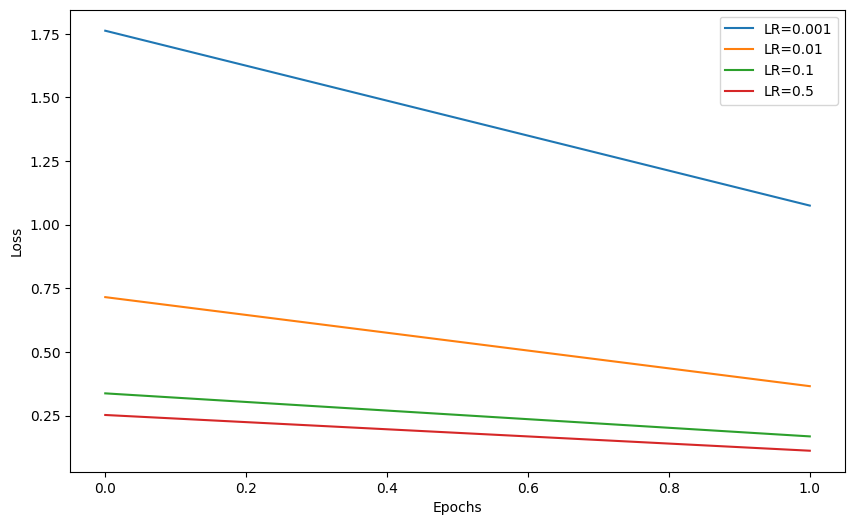

In [9]:
# 2. Analyze the Effect of Different Learning Rates in Gradient Descent 
# Task:  
# • Train a neural network using different learning rates (0.001, 0.01, 0.1, 0.5) and observe its 
# performance. 
# • Plot loss function over epochs for different learning rates. 

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist


(x_train, y_train), (x_test, y_test) = mnist.load_data()
 
x_train = x_train / 255.0
x_test = x_test / 255.0
 
learning_rates = [0.001, 0.01, 0.1, 0.5]
histories = {}

for lr in learning_rates:
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    optimizer = SGD(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, validation_split=0.2, epochs=2, batch_size=32, verbose=0)
    histories[f'LR={lr}'] = history
    
plt.figure(figsize=(10, 6))
for key, history in histories.items():
    plt.plot(history.history['loss'], label=key)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7044 - loss: 1.1272 - val_accuracy: 0.8972 - val_loss: 0.3804
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8962 - loss: 0.3772 - val_accuracy: 0.9133 - val_loss: 0.3103
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9117 - loss: 0.3184 - val_accuracy: 0.9227 - val_loss: 0.2780
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9199 - loss: 0.2819 - val_accuracy: 0.9291 - val_loss: 0.2539
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9278 - loss: 0.2562 - val_accuracy: 0.9345 - val_loss: 0.2374
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9302 - loss: 0.2486 - val_accuracy: 0.9369 - val_loss: 0.2243
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9353 - loss: 0.2251 - val_accuracy: 0.9418 - val_loss: 0.2125
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9396 - loss: 0.2149 - 

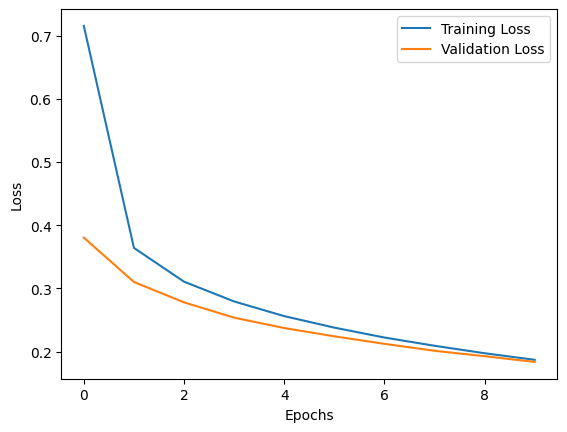

In [11]:
# 3. Train a Neural Network on the MNIST Dataset Using Gradient Descent 
# Task: 
# • Train a simple feedforward neural network on the MNIST dataset (handwritten digits 0-9). 
# • Use gradient descent for optimization.


import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
 
(x_train, y_train), (x_test, y_test) = mnist.load_data()
 
x_train = x_train / 255.0
x_test = x_test / 255.0
 
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
 
optimizer = SGD(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
 
history = model.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=32)
 
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
 
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

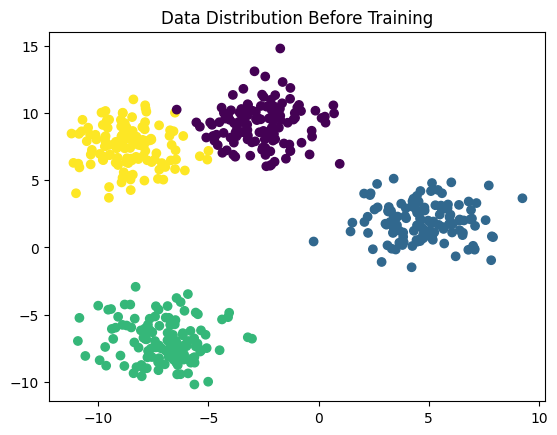

Epoch 1/50


c:\Users\R.PRAVEEN KUMAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5129 - loss: 1.2760 - val_accuracy: 0.8875 - val_loss: 1.0123
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8779 - loss: 0.9715 - val_accuracy: 0.9375 - val_loss: 0.7639
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9163 - loss: 0.7265 - val_accuracy: 0.9625 - val_loss: 0.5512
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9782 - loss: 0.5221 - val_accuracy: 0.9875 - val_loss: 0.3703
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9805 - loss: 0.3459 - val_accuracy: 0.9875 - val_loss: 0.2432
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9780 - loss: 0.2391 - val_accuracy: 1.0000 - val_loss: 0.1624
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9968 - loss: 0.1487 - val_accuracy: 1.0000 - val_loss: 0.1143
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9957 - loss: 0.1023 - val_accuracy: 1.0000 - val_loss: 0.0854
Ep

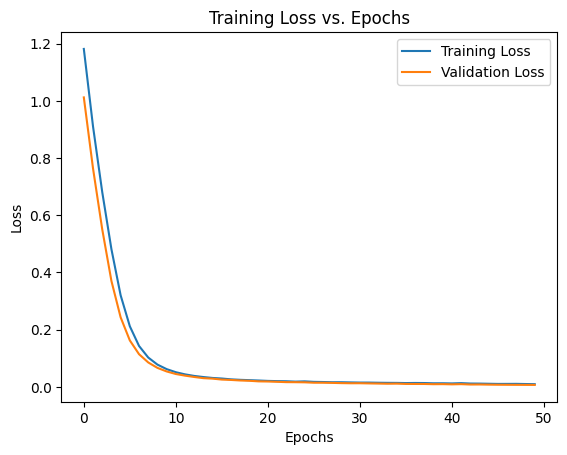

In [15]:
# 4. Implement Multi-Class Classification Using Backpropagation 
# Task: 
# • Implement an MLP to classify 3+ classes using Softmax activation in the output layer. 
# • Use Cross-Entropy loss for optimization. 
# • Plot data distribution before training. 
# • Visualize training loss vs. epochs. 


import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
 
x, y = make_blobs(n_samples=500, centers=4, cluster_std=1.5, random_state=42)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='viridis')
plt.title('Data Distribution Before Training')
plt.show()
 

scaler = StandardScaler()
x = scaler.fit_transform(x)
 
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))
 
x_train, x_test, y_train, y_test = train_test_split(x, y_onehot, test_size=0.2, random_state=42)
 
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))
 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
 
history = model.fit(x_train, y_train, validation_split=0.2, epochs=50, batch_size=16)
 
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8610 - loss: 0.4794 - val_accuracy: 0.9589 - val_loss: 0.1421
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9647 - loss: 0.1173 - val_accuracy: 0.9672 - val_loss: 0.1066
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9774 - loss: 0.0737 - val_accuracy: 0.9653 - val_loss: 0.1150
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9813 - loss: 0.0574 - val_accuracy: 0.9745 - val_loss: 0.0906
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9869 - loss: 0.0395 - val_accuracy: 0.9666 - val_loss: 0.1184
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9891 - loss: 0.0319 - val_accuracy: 0.9709 - val_loss: 0.1067
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9904 - loss: 0.0273 - val_accuracy: 0.9654 - val_loss: 0.1230
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9936 - loss: 0.0203 - 

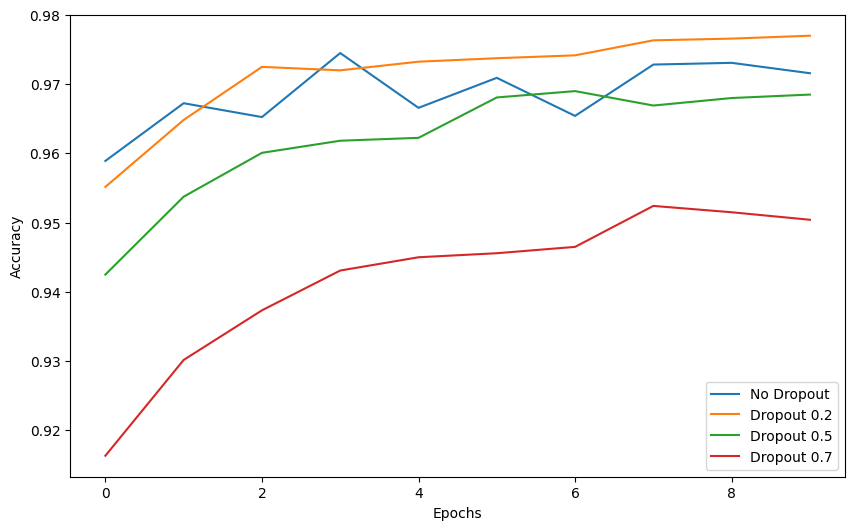

In [16]:
# 5. Implement Dropout Regularization 
# Task: 
# • Add Dropout to a neural network and train using any DL model. 
# • Compare performance with and without Dropout. 
# • Show effect of different Dropout rates (e.g., 0.2, 0.5, 0.7). 
# • Plot accuracy vs. epochs with and without Dropout. 


import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
 
(x_train, y_train), (x_test, y_test) = mnist.load_data()
 
x_train = x_train / 255.0
x_test = x_test / 255.0
 
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
 
histories = {}
 
model_no_dropout = Sequential([
    Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model_no_dropout.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_no_dropout = model_no_dropout.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=32)
histories['No Dropout'] = history_no_dropout
 
dropout_rates = [0.2, 0.5, 0.7]
for rate in dropout_rates:
    model_with_dropout = Sequential([
        Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
        Dropout(rate),
        Dense(64, activation='relu'),
        Dropout(rate),
        Dense(10, activation='softmax')
    ])
    model_with_dropout.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history_with_dropout = model_with_dropout.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=32)
    histories[f'Dropout {rate}'] = history_with_dropout
 
plt.figure(figsize=(10, 6))
for key, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=key)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

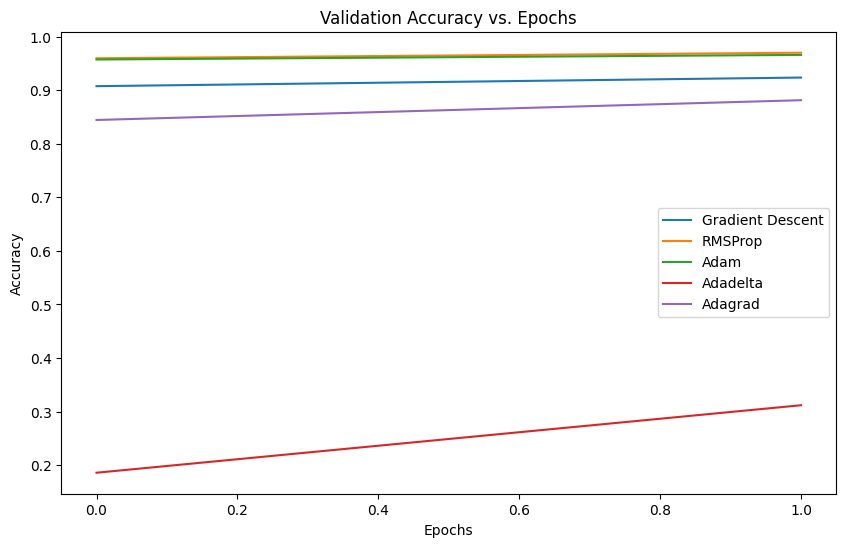

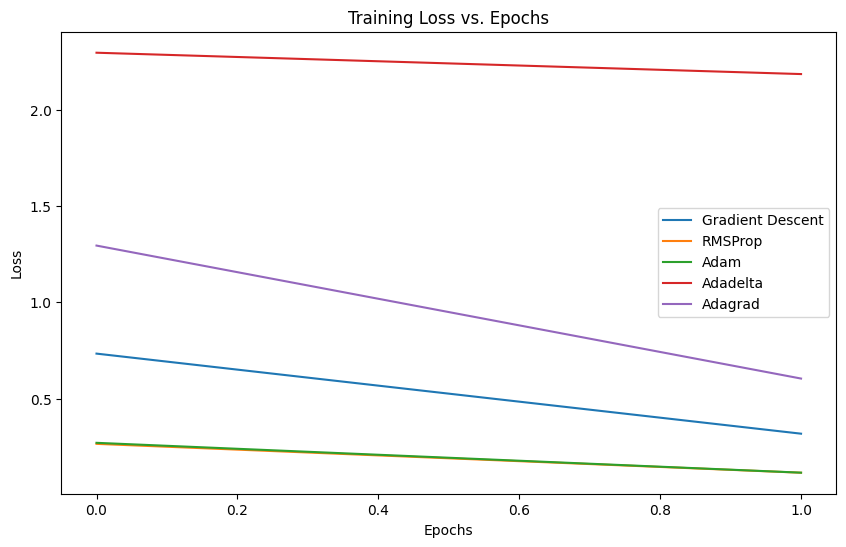

In [19]:
# 6. Implement and Compare Adam, RMSProp, Adadelta and Adagrad. 
# Task: 
# o Gradient Descent 
# o RMSProp 
# o Adam Optimizer 
# • Compare their convergence speeds and accuracy.


import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
 
(x_train, y_train), (x_test, y_test) = mnist.load_data()
 
x_train = x_train / 255.0
x_test = x_test / 255.0
 
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
 
optimizers = {
    'Gradient Descent': 'SGD',
    'RMSProp': 'RMSprop',
    'Adam': 'Adam',
    'Adadelta': 'Adadelta',
    'Adagrad': 'Adagrad'
}
 
histories = {}
 
for optimizer_name, optimizer in optimizers.items():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, validation_split=0.2, epochs=2, batch_size=32, verbose=0)
    histories[optimizer_name] = history
 
plt.figure(figsize=(10, 6))
for key, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=key)
plt.title('Validation Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
 
plt.figure(figsize=(10, 6))
for key, history in histories.items():
    plt.plot(history.history['loss'], label=key)
plt.title('Training Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

c:\Users\R.PRAVEEN KUMAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.3512 - loss: 1.7848 - val_accuracy: 0.5354 - val_loss: 1.3223
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.5613 - loss: 1.2347 - val_accuracy: 0.6154 - val_loss: 1.1109
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.6271 - loss: 1.0611 - val_accuracy: 0.6299 - val_loss: 1.0555
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.6748 - loss: 0.9439 - val_accuracy: 0.6463 - val_loss: 1.0296
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.7035 - loss: 0.8507 - val_accuracy: 0.6663 - val_loss: 0.9733
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.7279 - loss: 0.7969 - val_accuracy: 0.6773 - val_loss: 0.9348
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.7473 - loss: 0.7260 - val_accuracy: 0.6687 - val_loss: 0.9948
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.7697 - loss: 0.6654 - 

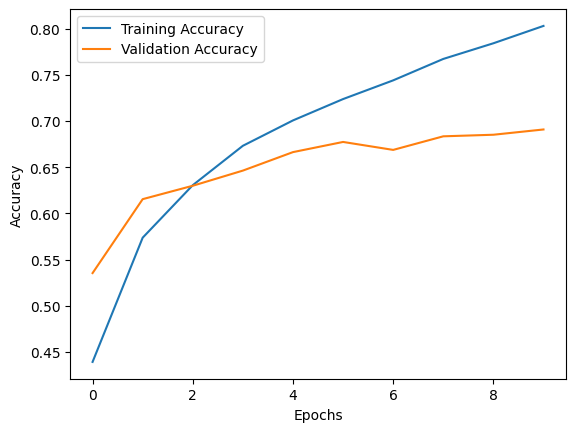

In [20]:
# 7. Build a CNN Classification Model for Image Recognition Using TensorFlow 
# Task: 
# • Build a Convolutional Neural Network (CNN) to classify images in a dataset (e.g., 
# CIFAR-10). 
# • Use Conv2D, MaxPooling, Flatten, Dense layers in TensorFlow/Keras. 
# • Train and evaluate the model’s accuracy


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
 
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
 
x_train = x_train / 255.0
x_test = x_test / 255.0
 
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
 
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
 
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)
 
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
 
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

c:\Users\R.PRAVEEN KUMAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9001 - loss: 0.3235 - val_accuracy: 0.9827 - val_loss: 0.0598
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9843 - loss: 0.0503 - val_accuracy: 0.9858 - val_loss: 0.0473
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9905 - loss: 0.0311 - val_accuracy: 0.9886 - val_loss: 0.0388
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9927 - loss: 0.0226 - val_accuracy: 0.9889 - val_loss: 0.0373
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9953 - loss: 0.0145 - val_accuracy: 0.9879 - val_loss: 0.0475
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9956 - loss: 0.0122 - val_accuracy: 0.9906 - val_loss: 0.0349
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9976 - loss: 0.0072 - val_accuracy: 0.9896 - val_loss: 0.0419
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9976 -

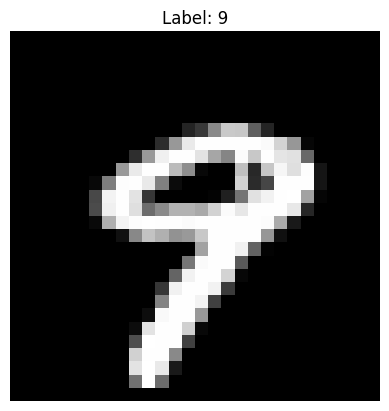

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


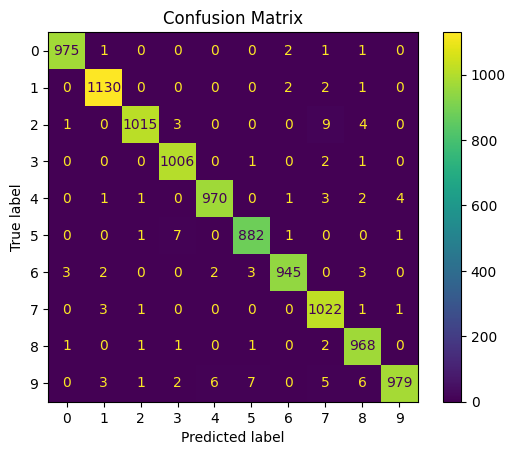

In [1]:
# 8. Implement a CNN Model for Handwritten Digit Recognition Using MNIST 
# Task: 
# • Train a CNN model to classify handwritten digits (0-9) from MNIST. 
# • Use multiple convolutional layers with ReLU activation. 
# • Evaluate the model on the test set. 
# •  Display random handwritten digit samples from MNIST. 
# • Plot confusion matrix to analyze classification performance. 

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1) / 255.0
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1) / 255.0
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=32)
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
 
random_sample = x_test[9]
random_label = y_test[9]
plt.imshow(random_sample, cmap='gray')
plt.title(f"Label: {random_label}")
plt.axis('off')
plt.show()
y_pred = np.argmax(model.predict(x_test), axis=1)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap='viridis')
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# 9. Implement Transfer Learning for Image Classification Using a Pretrained CNN 
# Task: 
# • Use a pretrained model (VGG16) for image classification. 
# • Fine-tune the model on a new dataset (e.g., flower classification).

from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
 
def load_data(dataset_path, target_size=(224, 224)):
    x, y = [], []
    classes = sorted(os.listdir(dataset_path))
    for label, class_name in enumerate(classes):
        class_folder = os.path.join(dataset_path, class_name)
        for image_file in os.listdir(class_folder):
            img_path = os.path.join(class_folder, image_file)
            img = load_img(img_path, target_size=target_size)
            img_array = img_to_array(img) / 255.0
            x.append(img_array)
            y.append(label)
    return np.array(x), np.array(y), len(classes)
 
dataset_path = "path_to_flower_dataset"
x, y, num_classes = load_data(dataset_path)
 
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)
 
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False
 
model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])
 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
 
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=5, batch_size=32)
loss, accuracy = model.evaluate(x_val, y_val)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

In [ ]:
# 10. Implement Transfer Learning for Image Classification Using a Pretrained CNN 
# Task: 
# • Use a pretrained model (mobilenetv2) for image classification. 
# • Fine-tune the model on a new dataset (e.g., flower classification). 


from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
 
def load_data(dataset_path, target_size=(224, 224)):
    x, y = []
    classes = sorted(os.listdir(dataset_path))
    for label, class_name in enumerate(classes):
        class_folder = os.path.join(dataset_path, class_name)
        for image_file in os.listdir(class_folder):
            img_path = os.path.join(class_folder, image_file)
            img = load_img(img_path, target_size=target_size)
            img_array = img_to_array(img) / 255.0
            x.append(img_array)
            y.append(label)
    return np.array(x), np.array(y), len(classes)
 
dataset_path = "path_to_flower_dataset" # Give your own dataset
x, y, num_classes = load_data(dataset_path)
 
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)
 
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False
 
model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])
 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
 
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=5, batch_size=32)
loss, accuracy = model.evaluate(x_val, y_val)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

In [ ]:
# 11. Implement Transfer Learning for Image Classification Using a Pretrained CNN 
# Task: 
# • Use a pretrained model (efficientnet) for image classification. 
# • Fine-tune the model on a new dataset (e.g., flower classification)


from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
 
def load_data(dataset_path, target_size=(224, 224)):
    x, y = [], []
    classes = sorted(os.listdir(dataset_path))
    for label, class_name in enumerate(classes):
        class_folder = os.path.join(dataset_path, class_name)
        for image_file in os.listdir(class_folder):
            img_path = os.path.join(class_folder, image_file)
            img = load_img(img_path, target_size=target_size)
            img_array = img_to_array(img) / 255.0
            x.append(img_array)
            y.append(label)
    return np.array(x), np.array(y), len(classes)
 
dataset_path = "path_to_flower_dataset"
x, y, num_classes = load_data(dataset_path)
 
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)
 
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False
 
model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])
 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
 
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=5, batch_size=32)
loss, accuracy = model.evaluate(x_val, y_val)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")


In [ ]:
# 12. Build a classification model for text classification using various versions of Recurrent 
# Neural Networks (Simple RNN, Deep RNN, LSTM, GRU). Compare their parameters. 
 
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
max_features = 10000
max_len = 500
 
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)
 
def build_and_train_rnn(model_type):
    model = Sequential([
        Embedding(max_features, 128),
        model_type(128, return_sequences=False),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=3, batch_size=32, validation_data=(x_test, y_test))
    loss, accuracy = model.evaluate(x_test, y_test)
    print(f"{model_type.__name__} Test Accuracy: {accuracy * 100:.2f}%")
    return model.count_params()
 
simple_rnn_params = build_and_train_rnn(SimpleRNN)
deep_rnn_params = build_and_train_rnn(SimpleRNN)
lstm_params = build_and_train_rnn(LSTM)
gru_params = build_and_train_rnn(GRU)
 
print(f"Simple RNN Parameters: {simple_rnn_params}")
print(f"Deep RNN Parameters: {deep_rnn_params}")
print(f"LSTM Parameters: {lstm_params}")
print(f"GRU Parameters: {gru_params}")


In [ ]:
# 13. Build a deep learning model for multi digit number recognition
 

import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# Define and train the MNIST model
def create_mnist_model():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2,2)),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model
# Load MNIST dataset and train the model
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

mnist_model = create_mnist_model()
mnist_model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
# Preprocess the image
def preprocess_image(image_path='/content/123png.png'):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.GaussianBlur(img, (5,5), 0)
    _, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    kernel = np.ones((3,3), np.uint8)
    thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
    return thresh


    _, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    kernel = np.ones((3,3), np.uint8)
    thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
    return thresh
# Find contours and extract digits
def extract_digits(thresh_img):
    contours, _ = cv2.findContours(thresh_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    digit_images = []

    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        if w > 5 and h > 10:
            digit = thresh_img[y:y+h, x:x+w]

            # Preserve aspect ratio with padding
            square_size = max(h, w)
            padded_digit = np.zeros((square_size, square_size), dtype=np.uint8)
            y_offset = (square_size - h) // 2
            x_offset = (square_size - w) // 2
            padded_digit[y_offset:y_offset + h, x_offset:x_offset + w] = digit

            digit = cv2.resize(padded_digit, (28, 28))  # Ensure 28x28 size
            digit = digit.astype('float32') / 255.0  # Normalize
            digit_images.append((x, digit))

    digit_images = sorted(digit_images, key=lambda x: x[0])
    return [img for _, img in digit_images]
# Predict digits using MNIST model
def recognize_digits(digit_images):
    digits = []
    for digit in digit_images:
        digit = np.expand_dims(digit, axis=(0, -1))  # Reshape for model
        prediction = np.argmax(mnist_model.predict(digit), axis=-1)[0]
        digits.append(str(prediction))
    return "".join(digits)
# Main function
def recognize_number(image_path):
    thresh_img = preprocess_image(image_path)
    digit_images = extract_digits(thresh_img)
    if not digit_images:
        return "No digits found"
    return recognize_digits(digit_images)
# Example usage
# Keep your Image Path
image_path = "/content/123png.png"
print("Recognized Number:", recognize_number(image_path))


# Additional 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

# Load Flowers dataset from TensorFlow Datasets
train_data, test_data = tfds.load('tf_flowers', split=['train[:80%]', 'train[80%:]'], as_supervised=True)

# Preprocessing function
def preprocess(image, label):
    image = tf.image.resize(image, (224, 224))  # Resize images to 224x224
    image = preprocess_input(image)  # VGG16 preprocess
    return image, label

# Apply preprocessing
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_data.map(preprocess).batch(32).prefetch(AUTOTUNE)
test_ds = test_data.map(preprocess).batch(32).prefetch(AUTOTUNE)

# Load VGG16 base model (Pretrained on ImageNet)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = True  # Enable fine-tuning

# Define the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')  # 5 classes for flower classification
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(train_ds, epochs=5, verbose=1)

# Evaluate on test data
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Accuracy: {test_acc:.4f}")